# 실습 6: Vector Calculus & Interpolation (2024.11.27)

### 빅데이터수치해석 입문 및 실습
### 숙명여자대학교 기계시스템학부 심주용

### Reference:
 - Advanced Engineering Mathematics Book by Erwin Kreyszig


# Visualize scalar & vector fields
- Understanding Green Theorem/Stoke’s Theorem
- Understanding Divergence Theorem in 2D and 3D

열(heat flux)는 온도가 높은 곳에서 낮은 곳으로 흐르고 이것을 나타낸 미분방정식을 heat equation 이라고  한다.
1. 온도 분포에 대한 함수 $T(x,y)=x^2-y^2$ 에 대한 color map (heat map)과 contour plot을 그리세요.
2. $T(x,y)$에 대한 $grad T$ 를 계산하고 그리세요.
3. numerically grad T를 그리세요.
4. 반지름이 2 인 원에 대한 $grad T$의 접선 방향 선적분과 수직 방향 선적분을 구하라.

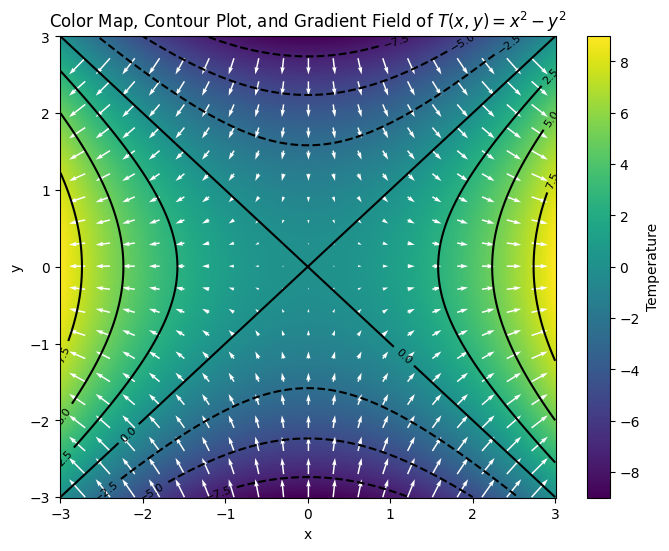

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the temperature function T(x, y) and its gradient
def T(x, y):
    return x**2 - y**2

def grad_T(x, y):
    return 2*x, -2*y

# Create a grid for the color map, contour plot, and vector field
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = T(X, Y)

# Compute the gradient
U, V = grad_T(X, Y)

# Plotting
plt.figure(figsize=(8, 6))

# Color map
plt.pcolormesh(X, Y, Z, cmap='viridis', shading='auto')
plt.colorbar(label='Temperature')

# Contour plot
contour = plt.contour(X, Y, Z, colors='black')
plt.clabel(contour, inline=True, fontsize=8)

# Vector field (gradient)
plt.quiver(X[::20, ::20], Y[::20, ::20], U[::20, ::20], V[::20, ::20], color='white')

plt.title('Color Map, Contour Plot, and Gradient Field of $T(x, y) = x^2 - y^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


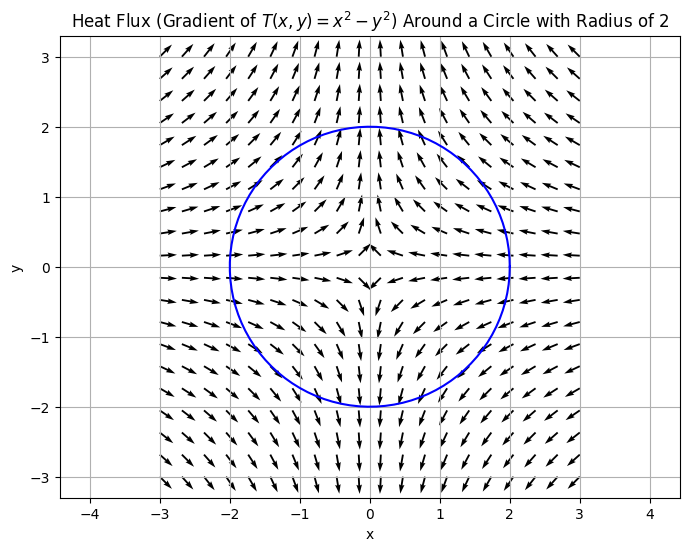

In [2]:
# Define the circle parameters
radius = 2
theta = np.linspace(0, 2*np.pi, 100)

# Circle coordinates
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Define the temperature function
def temperature(x, y):
    return x**2 - y**2

# Compute the gradient of the temperature function
def heat_flux(x, y):
    return -2*x, +2*y

# Create a grid for the vector field
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)

# Compute the heat_flux vectors
U, V = heat_flux(X, Y)

# Normalize the vectors for uniform arrow size
magnitude = np.sqrt(U**2 + V**2)
U_normalized = U / magnitude
V_normalized = V / magnitude

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_circle, y_circle, 'b-')  # circle plot
plt.quiver(X, Y, U_normalized, V_normalized)  # vector field plot

plt.title('Heat Flux (Gradient of $T(x, y) = x^2 - y^2$) Around a Circle with Radius of 2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
import numpy as np
import scipy.integrate as integrate

# Define the temperature function T(x, y) and its gradient
def T(x, y):
    return x**2 - y**2

def grad_T(x, y):
    return 2*x, -2*y

# Parametrize the circle
def circle_param(theta, radius=2):
    return radius * np.cos(theta), radius * np.sin(theta)

# Gradient of T along the circle
def grad_T_circle(theta):
    x, y = circle_param(theta)
    U, V = grad_T(x, y)
    # dx/dtheta and dy/dtheta
    dx_dtheta = -2 * np.sin(theta)
    dy_dtheta = 2 * np.cos(theta)
    # Dot product of gradient and differential element of the path
    return U * dx_dtheta + V * dy_dtheta

# Numerical integration around the circle
integral, _ = integrate.quad(grad_T_circle, 0, 2*np.pi)

integral

1.0952008878091804e-15

In [4]:
import numpy as np
import scipy.integrate as integrate

# Define the temperature function T(x, y) and its gradient
def grad_T(x, y):
    return 2*x, -2*y

# Parametrize the circle
def circle_param(theta, radius=2):
    return radius * np.cos(theta), radius * np.sin(theta)

# Gradient of T along the circle
def grad_T_circle(theta):
    x, y = circle_param(theta)
    U, V = grad_T(x, y)
    # dx/dtheta and dy/dtheta
    dx_dtheta = -2 * np.sin(theta)
    dy_dtheta = 2 * np.cos(theta)
    # Dot product of gradient and differential element of the path
    return U * dx_dtheta + V * dy_dtheta

theta_array = np.linspace(0, 2*np.pi,100)
d_theta = theta_array[1] - theta_array[0]

integral = 0
for th in theta_array: # Numerical integration around the circle

    if th == 0 or th == 2*np.pi:
        integral += grad_T_circle(th)*d_theta/2
    else:
        integral += grad_T_circle(th)*d_theta
integral

-1.0136200907476596e-15

In [5]:
import numpy as np
import scipy.integrate as integrate

# Define the temperature function T(x, y) and its gradient
def grad_T(x, y):
    return 2*x, -2*y

# Parametrize the circle
def circle_param(theta, radius=2):
    return radius * np.cos(theta), radius * np.sin(theta)

# Gradient of T along the circle
def grad_T_circle(th1, th2):
    x1, y1 = circle_param(th1)
    x2, y2 = circle_param(th2)
    u, v = grad_T(x1, y1)
    dx, dy = x2 - x1, y2 - y1     # dot ([u,v],[dx, dy])
    return u * dx + v * dy

theta_array = np.linspace(0, 2*np.pi,100)
d_theta = theta_array[1] - theta_array[0]

integral = 0 # Numerical integration around the circle
for i in range(0, len(theta_array)-1):
    th1, th2 = theta_array[i], theta_array[i+1]
    if i == 0 or i == len(theta_array)-1:
        integral += grad_T_circle(th1, th2)/2
    else:
        integral += grad_T_circle(th1, th2)
integral

0.008053294112461959

# Cubic Spline Interpolation

[[4. 0. 0. 0.]
 [0. 5. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]
[[4.  1.5 0.  0. ]
 [1.5 5.  1.  0. ]
 [0.  1.  3.  0.5]
 [0.  0.  0.5 4. ]]
[  0. -30.   6.  16.]
M [ 0.          2.87049659 -7.65465758  3.96754301  3.50405712  0.        ]


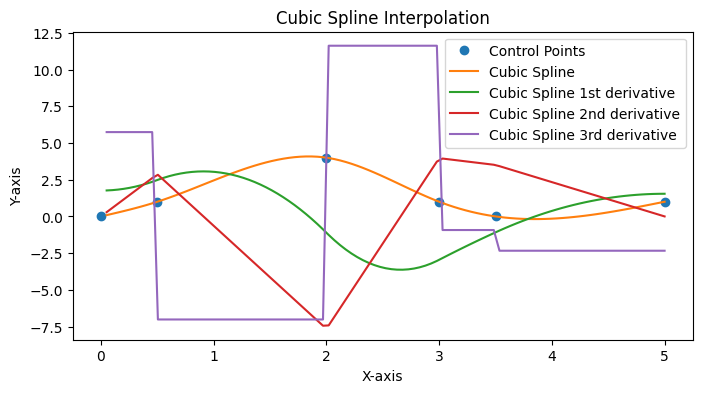

In [6]:
import numpy as np

def cubic_spline(x, y):
    n = len(x) - 1
    h = np.diff(x)

    # Calculate the diagonal of the system
    A = np.diag(2 * (h[:-1] + h[1:]))

    print(A)
    # Calculate the upper and lower diagonals
    upper_diag = np.diag(h[1:-1], k=1)
    lower_diag = np.diag(h[1:-1], k=-1)

    # Assemble the full system
    A = A + upper_diag + lower_diag

    print(A)
    # Right hand side - second derivatives
    b = 6 * np.diff(np.diff(y) / h)

    print(b)
    # Solve the system
    M = np.zeros(n + 1)
    M[1:-1] = np.linalg.solve(A, b)

    print('M', M)
    # Compute the coefficients
    a = (M[1:] - M[:-1]) / (6 * h)
    b = M[:-1] / 2
    c = (y[1:] - y[:-1]) / h - (h * (2 * M[:-1] + M[1:]) / 6)
    d = y[:-1]

    def spline(new_x):
        if new_x < x[0] or new_x > x[-1]:
            return None
        i = np.searchsorted(x, new_x) - 1
        dx = new_x - x[i]
        return a[i] * dx**3 + b[i] * dx**2 + c[i] * dx + d[i]

    def spline_p(new_x):
        if new_x < x[0] or new_x > x[-1]:
            return None
        i = np.searchsorted(x, new_x) - 1
        dx = new_x - x[i]
        return 3* a[i] * dx**2 + 2*b[i] * dx + c[i]

    def spline_pp(new_x):
        if new_x < x[0] or new_x > x[-1]:
            return None
        i = np.searchsorted(x, new_x) - 1
        dx = new_x - x[i]
        return 6* a[i] * dx + 2*b[i]

    def spline_ppp(new_x):
        if new_x < x[0] or new_x > x[-1]:
            return None
        i = np.searchsorted(x, new_x) - 1
        dx = new_x - x[i]
        return 6* a[i]

    return spline, spline_p, spline_pp, spline_ppp

# Example data
x = np.array([0, 0.5, 2, 3, 3.5, 5])
y = np.array([0, 1, 4, 1, 0, 1])

# Create spline and interpolate
spline_func, spline_func_p, spline_func_pp, spline_func_ppp = cubic_spline(x, y)
x_new = np.linspace(0, 5, 100)
y_new = [spline_func(xi) for xi in x_new]
y_new_p = [spline_func_p(xi) for xi in x_new]
y_new_pp = [spline_func_pp(xi) for xi in x_new]
y_new_ppp = [spline_func_ppp(xi) for xi in x_new]

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o', label='Control Points')
plt.plot(x_new[1:], y_new[1:], label='Cubic Spline')
plt.plot(x_new[1:], y_new_p[1:], label='Cubic Spline 1st derivative')
plt.plot(x_new[1:], y_new_pp[1:], label='Cubic Spline 2nd derivative')
plt.plot(x_new[1:], y_new_ppp[1:], label='Cubic Spline 3rd derivative')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cubic Spline Interpolation')
plt.show()


# Bilinear Interpolation

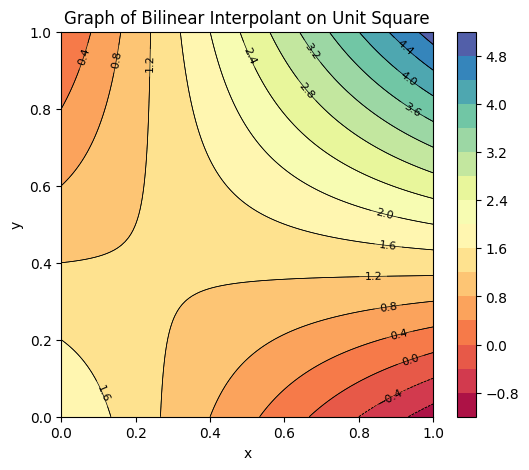

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the bilinear interpolation function
def bilinear_interpolation(x, y, v, xi, yi):
    x1, x2 = x
    y1, y2 = y
    q11, q12, q21, q22 = v

    return (q11 * (x2 - xi) * (y2 - yi) +
            q21 * (xi - x1) * (y2 - yi) +
            q12 * (x2 - xi) * (yi - y1) +
            q22 * (xi - x1) * (yi - y1)) / ((x2 - x1) * (y2 - y1))

# Step 2: Define sparse data points
# Corners of the unit square
x = np.array([0, 1, 0, 1])
y = np.array([0, 0, 1, 1])
# Values at the corners
# z = np.array([1, 2, 3, 4])
z = np.array([2, 0, -1, 5])  # Example values at the corners of the unit square

# Step 3: Create a dense grid of points where we want to interpolate
xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
xi, yi = np.meshgrid(xi, yi)

# Step 4: Perform bilinear interpolation over the grid
zi = np.array([[bilinear_interpolation((0, 1), (0, 1), (2, 0, -1, 5), xj, yj) for xj in xi[0]] for yj in yi[:, 0]])

# Step 5: Generate the contour plot with labels
plt.figure(figsize=(6, 5))
contour = plt.contourf(xi, yi, zi, levels=15, cmap='Spectral')
plt.colorbar(contour)
plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5)
plt.clabel(plt.contour(xi, yi, zi, levels=15, colors='black', linewidths=0.5), inline=True, fontsize=8)

# Step 6: Add titles and labels
plt.title('Graph of Bilinear Interpolant on Unit Square')
plt.xlabel('x')
plt.ylabel('y')

# Step 7: Show the plot
plt.show()


--2024-11-27 04:33:13--  https://raw.githubusercontent.com/jooyongsim/numerical2023/refs/heads/main/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888111 (867K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 867.30K  --.-KB/s    in 0.05s   

2024-11-27 04:33:14 (18.0 MB/s) - ‘dog.jpg’ saved [888111/888111]



<ipython-input-9-4988c2f4a935>:18: RuntimeWarning: invalid value encountered in scalar divide
  return (values[y1, x1] * x2_x * y2_y +
<ipython-input-9-4988c2f4a935>:52: RuntimeWarning: invalid value encountered in cast
  resized_image_pixels[i, j, channel] = np.clip(pixel_value, 0, 255)


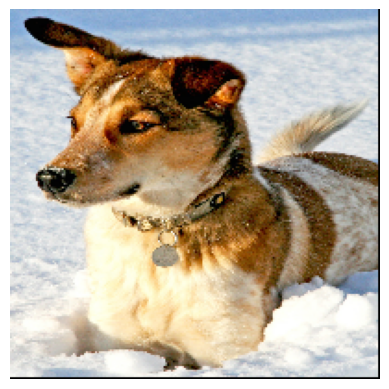

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Vectorized bilinear interpolation function
def bilinear_interpolation(x, y, values, xi, yi):
    # Assumes values are indexed [y, x]
    x1, x2 = x
    y1, y2 = y

    # Interpolation weights
    x2_x = x2 - xi
    y2_y = y2 - yi
    xi_x1 = xi - x1
    yi_y1 = yi - y1

    # Bilinear interpolation
    return (values[y1, x1] * x2_x * y2_y +
            values[y1, x2] * xi_x1 * y2_y +
            values[y2, x1] * x2_x * yi_y1 +
            values[y2, x2] * xi_x1 * yi_y1) / ((x2 - x1) * (y2 - y1))

!wget https://raw.githubusercontent.com/jooyongsim/numerical2023/refs/heads/main/dog.jpg

# Step 2: Read the original image
original_image = Image.open('dog.jpg')  # Replace with your image path
original_image = original_image.convert('RGB')  # Ensure image is in RGB mode
original_pixels = np.array(original_image)

# Step 3: Define new size and create a grid for the resized image
new_width, new_height = 200, 200  # Example new size
new_x = np.linspace(0, original_pixels.shape[1] - 1, new_width)
new_y = np.linspace(0, original_pixels.shape[0] - 1, new_height)
new_xi, new_yi = np.meshgrid(new_x, new_y)

# Step 4: Map coordinates of the new image to the original image coordinates
mapped_x = new_xi.astype(int)
mapped_y = new_yi.astype(int)

# Step 5: Construct new image using bilinear interpolation
resized_image_pixels = np.zeros((new_height, new_width, 3), dtype=np.uint8)
for channel in range(3):  # Loop over color channels
    for i in range(new_height):
        for j in range(new_width):
            x_coords = (mapped_x[i, j], min(mapped_x[i, j] + 1, original_pixels.shape[1] - 1))
            y_coords = (mapped_y[i, j], min(mapped_y[i, j] + 1, original_pixels.shape[0] - 1))
            pixel_value = bilinear_interpolation(
                x_coords, y_coords,
                original_pixels[:, :, channel],
                new_xi[i, j], new_yi[i, j]
            )
            resized_image_pixels[i, j, channel] = np.clip(pixel_value, 0, 255)

# Step 6: Convert the interpolated array to an image and display it
resized_image = Image.fromarray(resized_image_pixels)
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


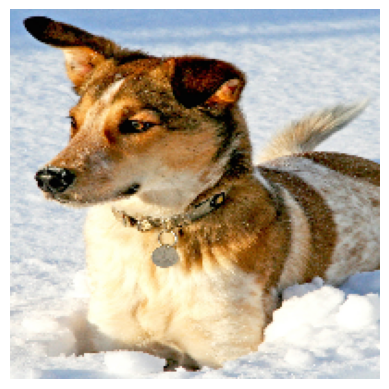

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Define the bilinear interpolation function
def bilinear_interpolation(src, x, y):
    x1 = np.floor(x).astype(int)
    x2 = x1 + 1
    y1 = np.floor(y).astype(int)
    y2 = y1 + 1

    x1 = np.clip(x1, 0, src.shape[1] - 1)
    x2 = np.clip(x2, 0, src.shape[1] - 1)
    y1 = np.clip(y1, 0, src.shape[0] - 1)
    y2 = np.clip(y2, 0, src.shape[0] - 1)

    I11 = src[y1, x1]  # Top-left
    I12 = src[y2, x1]  # Bottom-left
    I21 = src[y1, x2]  # Top-right
    I22 = src[y2, x2]  # Bottom-right

    w11 = (x2 - x) * (y2 - y)
    w12 = (x2 - x) * (y - y1)
    w21 = (x - x1) * (y2 - y)
    w22 = (x - x1) * (y - y1)

    return w11[..., np.newaxis] * I11 + w12[..., np.newaxis] * I12 + w21[..., np.newaxis] * I21 + w22[..., np.newaxis] * I22

# Step 2: Read the original image
original_image = Image.open('dog.jpg')
original_pixels = np.array(original_image)

# Step 3: Define new size and create a grid for the resized image
new_width, new_height = 200, 200  # Example new size

x_ratio = original_pixels.shape[1] / new_width
y_ratio = original_pixels.shape[0] / new_height

new_x = (np.arange(new_width) + 0.5) * x_ratio - 0.5
new_y = (np.arange(new_height) + 0.5) * y_ratio - 0.5

# Step 4: Perform bilinear interpolation over the grid
new_xi, new_yi = np.meshgrid(new_x, new_y)
resized_pixels = bilinear_interpolation(original_pixels, new_xi, new_yi)

# Step 5: Convert the interpolated array to an image and display it
resized_image = Image.fromarray(np.clip(resized_pixels, 0, 255).astype('uint8'))
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# N-D Interpolation

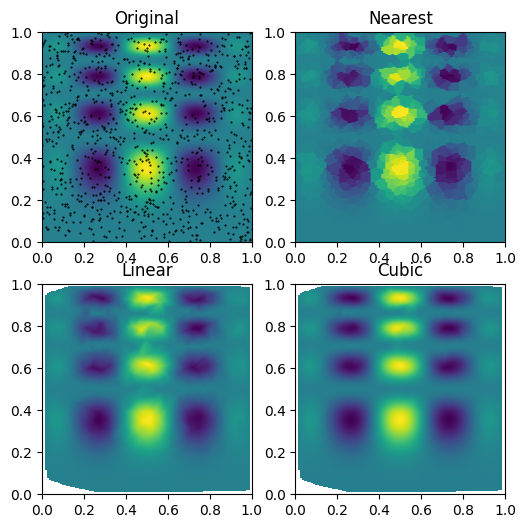

In [11]:
import numpy as np
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt

plt.figure(figsize=[30,30])
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

# Line Integration of Non-linear fuction

We will numerically integrate the dot product of a vector field gradient $\vec{F}(x, y) = (2x^2y, -2y)$ along a circular path of radius 2 in a 2D plane using a **discrete approximation of the line integral**. The circle is parameterized by the angle $\theta$, and the numerical integration is performed by dividing the circle into small segments and summing the contributions from each segment.

This is a streamlined version, further simplifying the integration process. It integrates the vector field gradient directly using the tangent vectors, with no special handling of the endpoints for the trapezoidal rule.

Key Features:
- The integral is computed by summing the contributions of $F_{circle}(\theta) \cdot d\theta$ over all $\theta$ values.
- The lack of endpoint adjustment may slightly reduce numerical accuracy compared to the previous two codes.
- This version prioritizes simplicity while maintaining correctness for most cases.

In [12]:
import numpy as np
import scipy.integrate as integrate

def vector_F(x, y):
    return 2*x*x*y, -2*y

# Parametrize the circle
def circle_param(theta, radius=2):
    return radius * np.cos(theta), radius * np.sin(theta)

# Gradient of T along the circle
def F_circle(theta):
    x, y = circle_param(theta)
    U, V = vector_F(x, y)
    # dx/dtheta and dy/dtheta
    dx_dtheta = -2 * np.sin(theta)
    dy_dtheta = 2 * np.cos(theta)
    # Dot product of gradient and differential element of the path
    return U * dx_dtheta + V * dy_dtheta

# Numerical integration around the circle
theta_array = np.linspace(0, 2*np.pi,100)
d_theta = theta_array[1] - theta_array[0]

integral = 0
for th in theta_array:
    integral += F_circle(th)*d_theta
integral

-25.13274122871835

This code performs the same integration but uses a different approach to calculate the dot product between the vector field gradient and the tangent vector to the circle. Instead of manually computing segment vectors $(dx, dy)$, it derives the tangent vector components $dx/d\theta$ and $dy/d\theta$ from the parametric equations of the circle.

Key Features:
- The tangent vectors of the circle are computed using the derivatives of $x(\theta)$ and $y(\theta)$ with respect to $\theta$.
- The dot product is computed directly between $\vec{F}(x, y)$ and $(dx/d\theta, dy/d\theta)$, making the code more compact.
- The integration uses the **trapezoidal rule** at $\theta = 0$ and $\theta = 2\pi$ for better accuracy.


In [13]:
import numpy as np
import scipy.integrate as integrate

# Define the temperature function T(x, y) and its gradient
def vector_F(x, y):
    return 2*x*x*y, -2*y

# Parametrize the circle
def circle_param(theta, radius=2):
    return radius * np.cos(theta), radius * np.sin(theta)

# Gradient of T along the circle
def F_circle(theta):
    x, y = circle_param(theta)
    U, V = vector_F(x, y)
    # dx/dtheta and dy/dtheta
    dx_dtheta = -2 * np.sin(theta)
    dy_dtheta = 2 * np.cos(theta)
    # Dot product of gradient and differential element of the path
    return U * dx_dtheta + V * dy_dtheta

theta_array = np.linspace(0, 2*np.pi,100)
d_theta = theta_array[1] - theta_array[0]

integral = 0
for th in theta_array: # Numerical integration around the circle

    if th == 0 or th == 2*np.pi:
        integral += F_circle(th)*d_theta/2
    else:
        integral += F_circle(th)*d_theta
integral

-25.13274122871835

Key Features:
- Parametric representation of a circle: $x(\theta) = 2 \cos(\theta)$, $y(\theta) = 2 \sin(\theta)$.
- Numerical calculation of the dot product between $\vec{F}(x, y)$ and the segment's vector differential $(dx, dy)$ for every $\theta$.
- The integral accounts for the endpoints of the parameterized circle separately to apply the **trapezoidal rule** for more accurate results.

---

In [14]:
import numpy as np
import scipy.integrate as integrate

# Define the temperature function T(x, y) and its gradient
def vector_F(x, y):
    return 2*x*x*y, -2*y

# Parametrize the circle
def circle_param(theta, radius=2):
    return radius * np.cos(theta), radius * np.sin(theta)

# Gradient of T along the circle
def F_circle(th1, th2):
    x1, y1 = circle_param(th1)
    x2, y2 = circle_param(th2)
    u, v = vector_F(x1, y1)
    dx, dy = x2 - x1, y2 - y1     # dot ([u,v],[dx, dy])
    return u * dx + v * dy

theta_array = np.linspace(0, 2*np.pi,10000)
d_theta = theta_array[1] - theta_array[0]

integral = 0 # Numerical integration around the circle
for i in range(0, len(theta_array)-1):
    th1, th2 = theta_array[i], theta_array[i+1]
    if i == 0 or i == len(theta_array)-1:
        integral += F_circle(th1, th2)/2
    else:
        integral += F_circle(th1, th2)
integral

-25.124843101811162